In [2]:
from datasets import load_dataset
import transformers
dataset = load_dataset("swissnp/gemini_CoT_for_training_dataset", revision="6df5b2edb92a9f78bce49b4e11f1bf519cc8137f")
tokenizer = transformers.AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['input', 'output', '__index_level_0__'],
        num_rows: 31550
    })
})


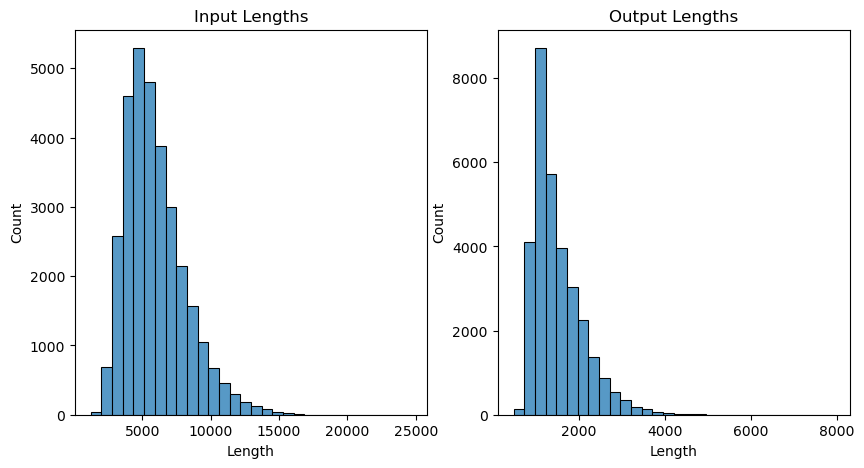

Total input tokens: 187381555
Total output tokens: 47324320


In [5]:
# plot the distribution of the number of tokens in the dataset both input and output print the total of each also
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


def plot_distribution(dataset, tokenizer):
    input_lens = []
    output_lens = []
    for example in dataset:
        input_lens.append(len(tokenizer(example["input"])["input_ids"]))
        output_lens.append(len(tokenizer(example["output"])["input_ids"]))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(input_lens, bins=30)
    plt.title("Input Lengths")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.subplot(1, 2, 2)
    sns.histplot(output_lens, bins=30)
    plt.title("Output Lengths")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.show()
    print("Total input tokens:", np.sum(input_lens))
    print("Total output tokens:", np.sum(output_lens))
    
plot_distribution(dataset["train"], tokenizer)

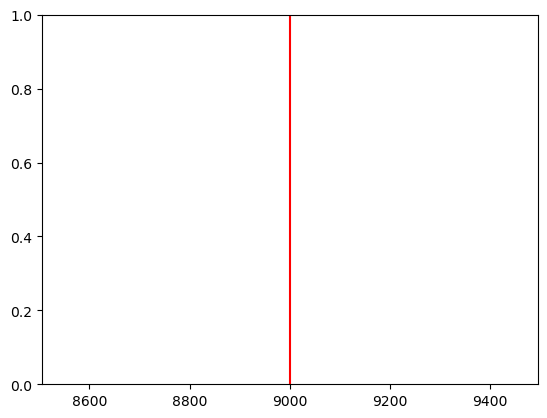

In [5]:
plt.axvline(x=9000, color="red")
plt.show()